In [1]:
import pickle 
import matplotlib.pyplot as plt


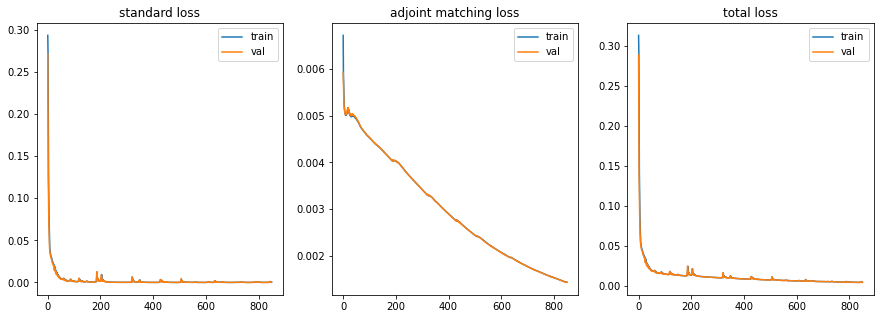

In [2]:
with open('./figs_adjoint/logger_mixed_init', 'rb') as f:
    logger = pickle.load(f)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(logger['train_std_loss'], label='train')
ax[0].plot(logger['val_std_loss'], label='val')
ax[1].plot(logger['train_adj_loss'], label='train')
ax[1].plot(logger['val_adj_loss'], label='val')
ax[2].plot(logger['train_tot_loss'], label='train')
ax[2].plot(logger['val_tot_loss'], label='val')
ax[0].set_title('standard loss')
ax[1].set_title('adjoint matching loss')
ax[2].set_title('total loss')
for a in ax:
    a.legend()
# fig.savefig('./figs_adjoint/trainingCurve_mixed_nu.pdf', format='pdf')
plt.show()

# Compare the adjoint of the NN (trained) and forward solver

In [47]:
from adjoint_matching import *
from scipy import linalg


net = FNN(num_layers=10, hidden_dim=200, output_dim=128, act_fn='tanh')
net.load_weights('./figs_adjoint/model/weights_mixed_init')
sup = AdjointMatchTrainer(net=net, data_path='./Data/mixed_init_cond/', save_name=None)
test = sup.prepare_data('test')
pred = net(test['x']).numpy()
pred_adj = sup.obtain_adjoint(test['x']).numpy()
true = test['y'].numpy()
true_adj = test['adj'].numpy()

print(true.shape, pred.shape)
print(test['x'].shape)

# diff = true_adj - pred_adj
# diff_sol = true - pred
# print(linalg.norm(diff))
# print(linalg.norm(diff_sol))


['sol_adj_coef_0.5pi.pkl']
(200, 128) (200, 128)
(200, 128)


In [66]:
# the plotter
import matplotlib.pyplot as plt
from matplotlib import animation

class Plotter:
    def __init__(self, data) -> None:
        
        # make the plot setting.
        # data -> a dict with keys 'pred', 'true'. 
        self.data = data
    def sol_plots(self, figsize, dpi=300):
        fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=figsize)
        ax1.imshow(self.data['true'].T, interpolation='nearest',
                    cmap='rainbow',
                    extent=[0, 1, -1, 1],
                    origin='lower', aspect='auto')
        ax2.imshow(self.data['pred'].T, interpolation='nearest',
                    cmap='rainbow',
                    extent=[0, 1, -1, 1],
                    origin='lower', aspect='auto')
        ax1.set_title('true')
        ax2.set_title('predicted')
        t = np.linspace(0, 1, self.data['true'].shape[0])
        x = np.linspace(-1, 1, self.data['true'].shape[1])
        frames = []
        for i in range(self.data['true'].shape[0]):
            im, = ax3.plot(x, self.data['true'].T[:, i], label='true', color='blue')
            im2, = ax3.plot(x, self.data['pred'].T[:, i], label='pred', color='red')
            im3 = ax3.text(0.7, 0.6, 't = %.3f' % t[i], transform=ax3.transAxes)
            frames.append([im, im2, im3])
        ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True,
                                repeat_delay=1000)
        writergif = animation.PillowWriter(fps=15)
        ani.save('filename.gif',writer=writergif)

        # ax3.plot(self.data['true'].T[:,0])
        # ax3.plot(self.data['true'].T[:,5])
        # ax3.plot(self.data['true'].T[:,10])
        # ax3.plot(self.data['true'].T[:,15])
        # ax3.plot(self.data['true'].T[:,-1])

    def adj_plots(self):
        pass
        
        

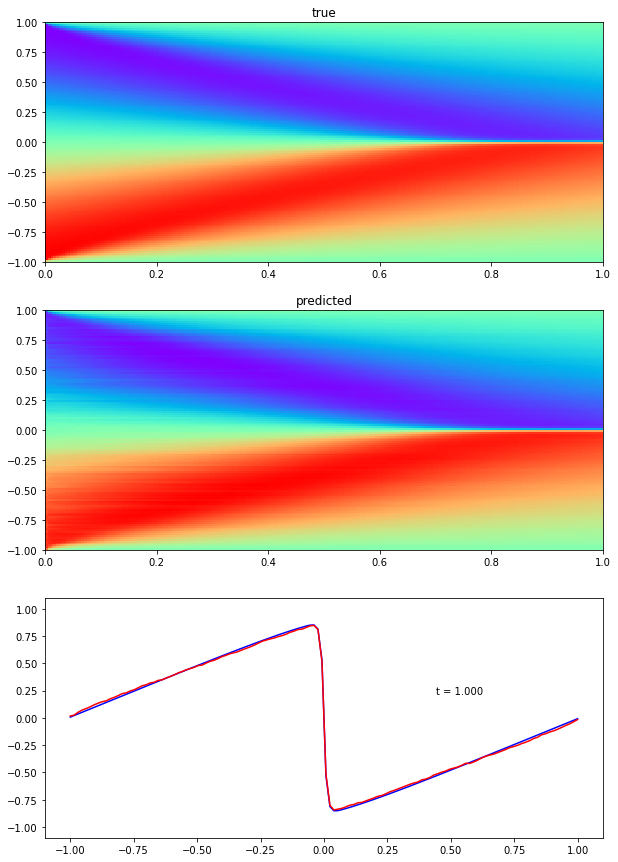

In [67]:
data = {'pred': pred, 'true': true}
plotter = Plotter(data)
plotter.sol_plots((10, 15))

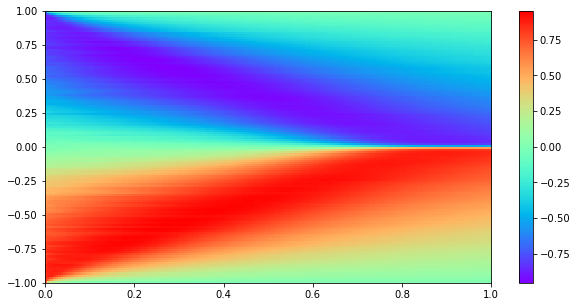

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.imshow(pred.T, interpolation='nearest',
                    cmap='rainbow',
                    extent=[0, 1, -1, 1],
                    origin='lower', aspect='auto')
plt.colorbar()
# plt.savefig('./figs_adjoint/pred_nu0.01-pi-adj.pdf', format='pdf')
plt.show()

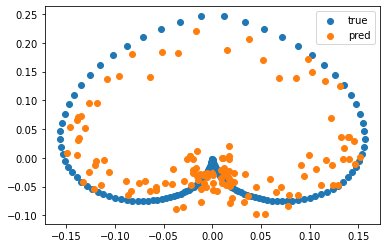

In [73]:
# vis adjoints
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
a = pca.fit_transform(true_adj[3])
b = pca.transform(pred_adj[3])

fig, ax = plt.subplots()
ax.scatter(a[:,0], a[:, 1], label='true')
ax.scatter(b[:, 0], b[:,1], label='pred')
# ax.imshow(pred_adj[0], cmap='rainbow')
plt.legend()
fig.savefig('./figs_adjoint/adj_nu0.5-pi-adj.pdf', format='pdf')


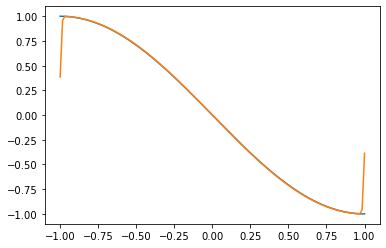

In [72]:
x = np.linspace(-1, 1, 128)
y = -np.sin(.5*np.pi*x)

plt.plot(x, y)
plt.plot(x,data['true'].T[:,0])